# Students Performance in Exams
Marks secured by the students in various subjects

In [1]:
# import the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Dataset into DataFrame
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# check the few rows
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Size of data frame
df.shape

(1000, 8)

In [5]:
# Descprictive stats for each column
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check for any missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

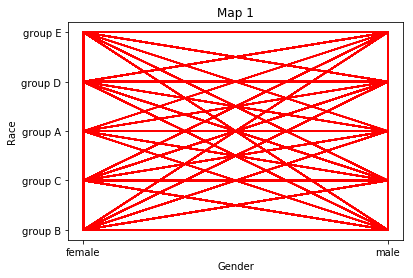

In [8]:
# Matplotlib
x = df['gender']
y = df['race/ethnicity']
plt.xlabel('Gender')
plt.ylabel('Race')
plt.title('Map 1')
plt.plot(x, y, 'red')
plt.show()

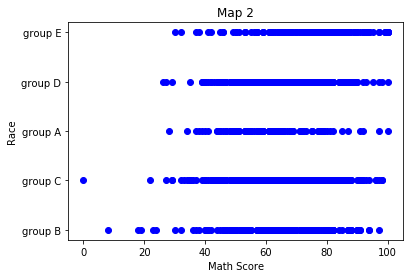

In [9]:
x = df['math score']
y = df['race/ethnicity']
plt.xlabel('Math Score')
plt.ylabel('Race')
plt.title('Map 2')
plt.scatter(x, y, marker='o', color = 'blue')
plt.show()

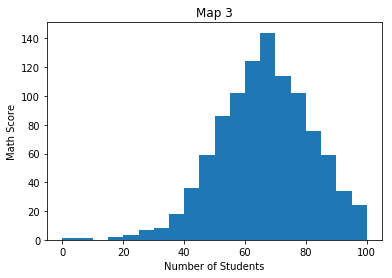

In [10]:
y = df['math score']
plt.xlabel('Number of Students')
plt.ylabel('Math Score')
plt.title('Map 3')
plt.hist(y, bins=20)
plt.show()

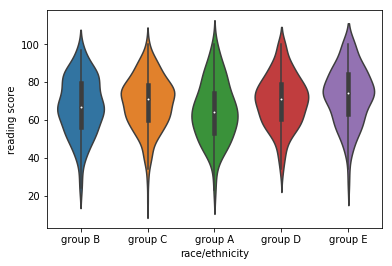

In [23]:
# SEABORN
#sns.violinplot(df['gender'],df['math score'])
sns.violinplot(df['race/ethnicity'],df['reading score'])

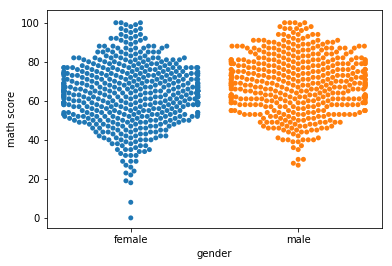

In [12]:
sns.swarmplot(df['gender'],df['math score'])

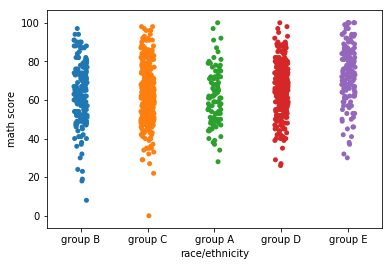

In [13]:
sns.stripplot(df['race/ethnicity'],df['math score'])

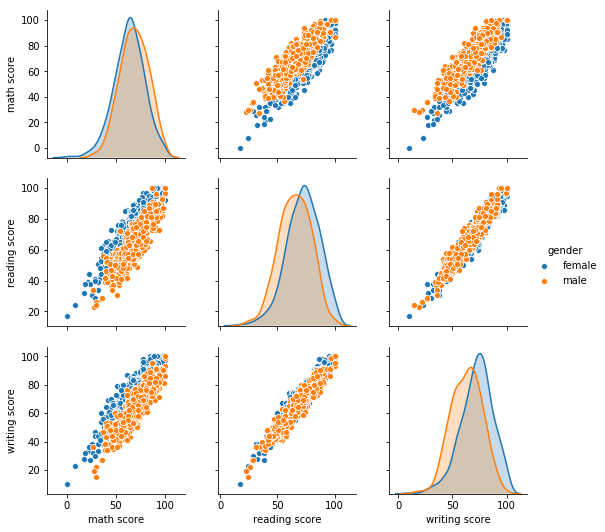

In [14]:
sns.pairplot(df, hue='gender')

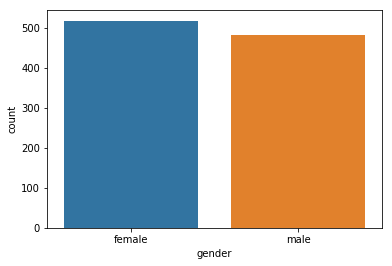

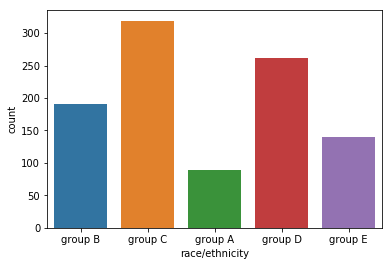

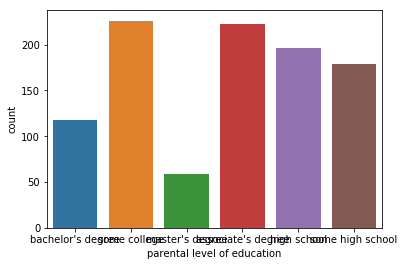

In [15]:
sns.countplot(x='gender', data=df)
plt.show()
sns.countplot(x='race/ethnicity', data=df)
plt.show()
sns.countplot(x='parental level of education', data=df)
plt.show()

counts 
 P    960
F     40
Name: Math_Pass, dtype: int64
-----------------------------------------------------


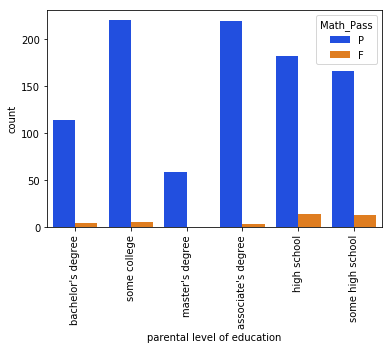

In [16]:
# Math Pass Analysis
df['Math_Pass'] = np.where(df['math score'] < 40, 'F', 'P')
print('counts \n', df.Math_Pass.value_counts())
print('-----------------------------------------------------')
m =sns.countplot(x= 'parental level of education', data=df, hue='Math_Pass', palette='bright')
_ = plt.setp(m.get_xticklabels(), rotation = 90)

Counts 
 P    974
F     26
Name: Read_Pass, dtype: int64
-----------------------------------------------------


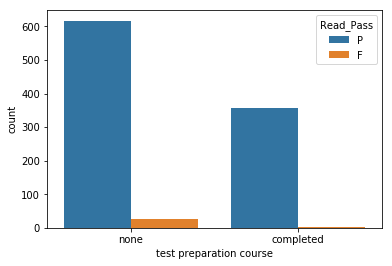

In [17]:
# Reading Pass
df['Read_Pass'] = np.where(df['reading score'] < 40, 'F','P')
print('Counts \n', df['Read_Pass'].value_counts())
print('-----------------------------------------------------')
sns.countplot(x='test preparation course', data=df, hue='Read_Pass')

count 
 P    968
F     32
Name: Write_Pass, dtype: int64
-----------------------------------------------------


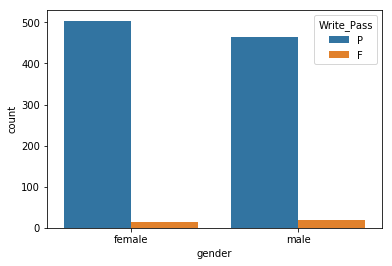

In [18]:
# Writting  Pass
df['Write_Pass'] = np.where(df['writing score'] < 40, 'F', 'P')
print('count \n', df['Write_Pass'].value_counts())
print('-----------------------------------------------------')
sns.countplot(x='gender', data=df, hue='Write_Pass')

 counts 
 Pass    949
Fail     51
Name: All3_Pass, dtype: int64
--------------------------------------------


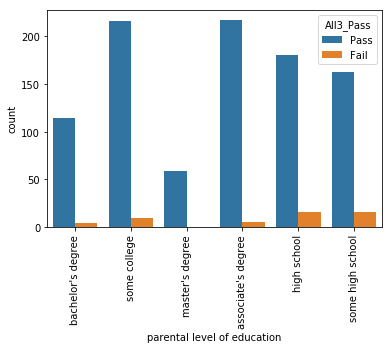

In [19]:
# All 3 exams Pass Analysis

df['All3_Pass'] = df.apply(lambda x : 'Fail' if x['Math_Pass'] == 'F' or x['Read_Pass'] == 'F' or x['Write_Pass'] == 'F' else 'Pass', axis=1)
print(' counts \n', df['All3_Pass'].value_counts())
print('--------------------------------------------')
m = sns.countplot(x='parental level of education', data=df, hue='All3_Pass')
_ = plt.setp(m.get_xticklabels(), rotation = 90)

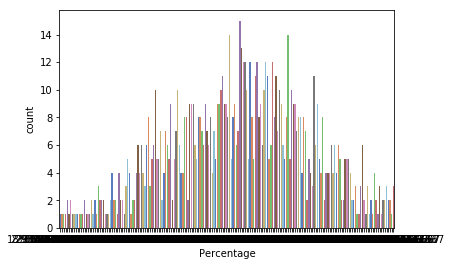

In [20]:
# Percentage of Marks
df['Total_Marks'] = df['math score'] + df['reading score'] + df['writing score']
df['Percentage'] = df['Total_Marks'] / 3
sns.countplot(x='Percentage', data=df, palette='muted')

In [21]:
def GetGrade(Percentage, All3_Pass):
    if (All3_Pass == 'Fail'):
        return 'F'
    if (Percentage >= 80):
        return 'A'
    if (Percentage >= 70):
        return 'B'
    if (Percentage >= 60):
        return 'C'
    if (Percentage >= 50):
        return 'D'
    if (Percentage >= 40):
        return 'E'
    else:
        return 'F'
    
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['All3_Pass']), axis=1)
df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

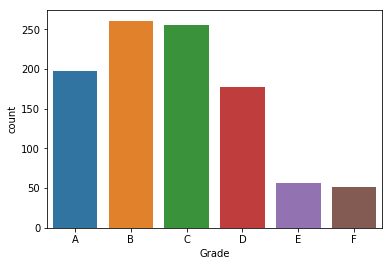

In [22]:
# Plot for the Grades
sns.countplot(x='Grade', data=df, order=['A', 'B', 'C', 'D', 'E', 'F'])

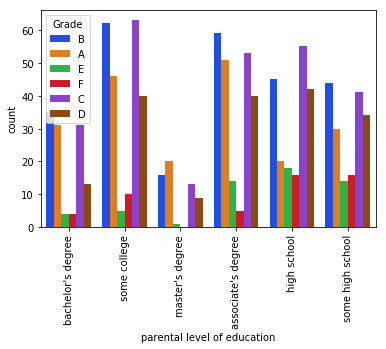

In [28]:
m = sns.countplot(x='parental level of education', data=df, hue='Grade', palette='bright')
_ = plt.setp(m.get_xticklabels(),rotation = 90)